In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2023-12-12 14:38:17.189881: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
image_size = 256
batch_size = 64
epochs = 20
channels = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("tomato/train")

Found 10000 files belonging to 10 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [5]:
len(dataset)

313

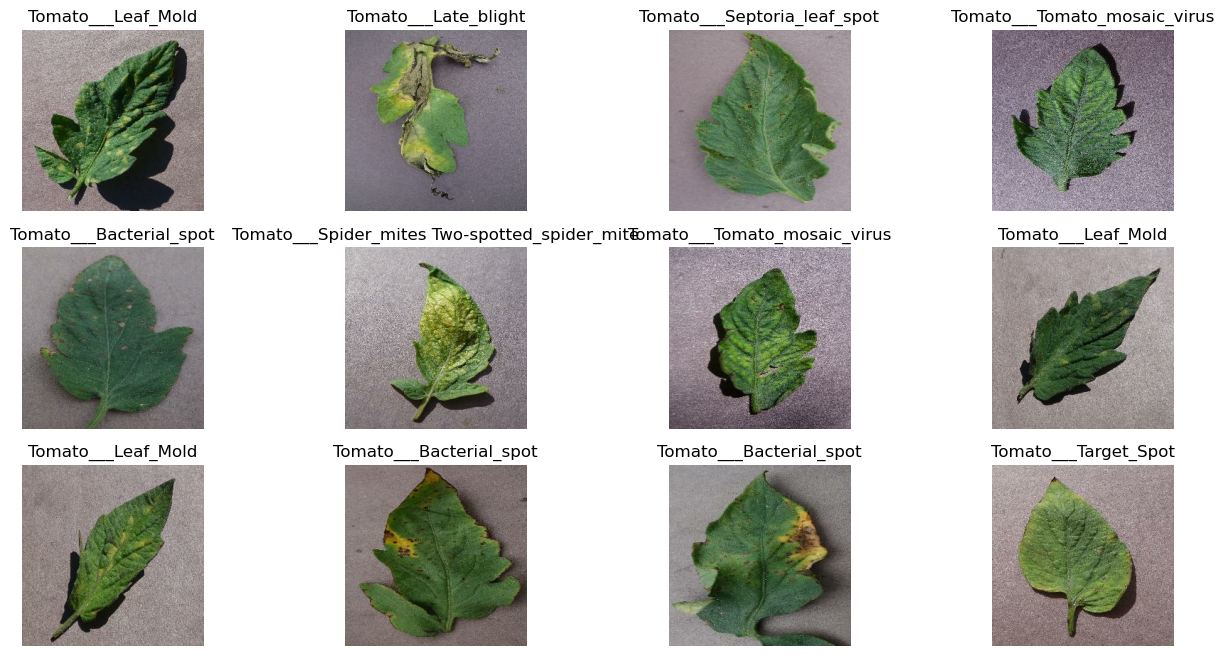

In [6]:
plt.figure(figsize=(16,8))
for image_label, batch_label in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_label[i].numpy().astype("uint8"))
        plt.title(class_names[batch_label[i]])
        plt.axis("off")

In [7]:
#Defining function for train-validation-test split
def split(ds, train_split = 0.8, val_split = 0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = split(dataset)

In [9]:
print("Train dataset size: ", len(train_ds))
print("Val dataset size: ", len(val_ds))
print("Test dataset size: ", len(test_ds))

Train dataset size:  250
Val dataset size:  31
Test dataset size:  32


## Data Preprocessing

In [10]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size, image_size),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

## Building a Model

In [13]:
#Traditional CNN Network

input_shape = (batch_size, image_size, image_size, channels)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu", input_shape=input_shape),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu", input_shape=input_shape),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu", input_shape=input_shape),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(128, kernel_size=(3,3), activation="relu", input_shape=input_shape),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(128, kernel_size=(3,3), activation="relu", input_shape=input_shape),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (64, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (64, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (64, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (64, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (64, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (64, 62, 62, 64)          0         
 g2D)                                                 

In [15]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [18]:
history = model.fit(
    train_ds,
    epochs=epochs,
    batch_size=batch_size,
    verbose = 1,
    validation_data=val_ds
)

Epoch 1/20


2023-12-12 15:04:53.940968: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 295 of 10000
2023-12-12 15:04:54.383772: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


250/250 [==============================] - 318s 1s/step - loss: 2.0958 - accuracy: 0.2048 - val_loss: 1.9741 - val_accuracy: 0.2756
Epoch 2/20
250/250 [==============================] - 300s 1s/step - loss: 1.5528 - accuracy: 0.4404 - val_loss: 1.3484 - val_accuracy: 0.5071
Epoch 3/20
250/250 [==============================] - 328s 1s/step - loss: 1.1415 - accuracy: 0.5862 - val_loss: 1.3310 - val_accuracy: 0.5373
Epoch 4/20
250/250 [==============================] - 344s 1s/step - loss: 0.9533 - accuracy: 0.6468 - val_loss: 1.2837 - val_accuracy: 0.5474
Epoch 5/20
250/250 [==============================] - 313s 1s/step - loss: 0.7788 - accuracy: 0.7100 - val_loss: 1.5702 - val_accuracy: 0.5585
Epoch 6/20
250/250 [==============================] - 301s 1s/step - loss: 0.7055 - accuracy: 0.7416 - val_loss: 0.7942 - val_accuracy: 0.7349
Epoch 7/20
250/250 [==============================] - 321s 1s/step - loss: 0.6202 - accuracy: 0.7748 - val_loss: 1.1307 - val_accuracy: 0.6522
Epoch 8/20

In [19]:
scores = model.evaluate(test_ds)

32/32 [==============================] - 17s 354ms/step - loss: 0.3996 - accuracy: 0.8613


In [20]:
scores

[0.39959031343460083, 0.861328125]

In [21]:
history


In [22]:
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 20, 'steps': 250}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [23]:
acc = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

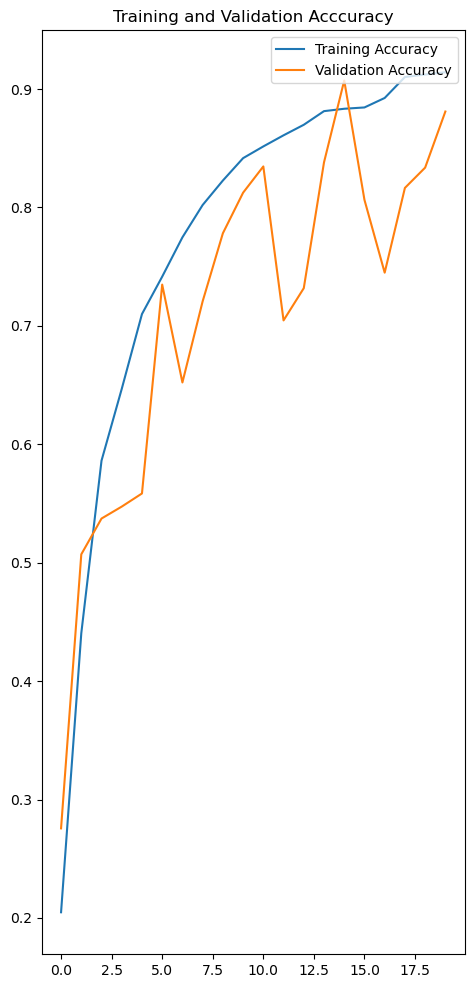

In [26]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)

plt.plot(range(epochs), acc, label="Training Accuracy")
plt.plot(range(epochs), val_accuracy, label="Validation Accuracy")

plt.legend(loc="upper right")
plt.title("Training and Validation Acccuracy")
plt.show()

In [32]:
import numpy as np

First Image to Predict
Actual:  Tomato___Septoria_leaf_spot
1/1 [==============================] - 0s 389ms/step
Predicted:  Tomato___Septoria_leaf_spot


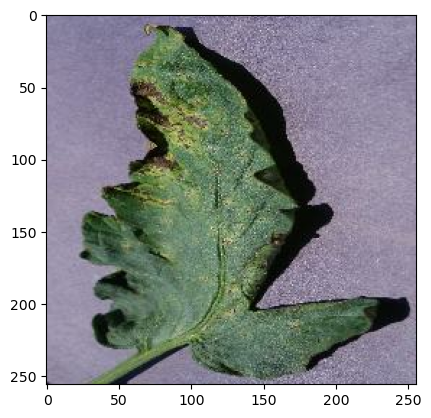

In [34]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0]
    
    print("First Image to Predict")
    plt.imshow(first_image)
    print("Actual: ", class_names[labels_batch[0]])
    
    batch_predictions =  model.predict(images_batch)
    print("Predicted: ",class_names[np.argmax(batch_predictions[0])])    

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence
    

1/1 [==============================] - 0s 35ms/step


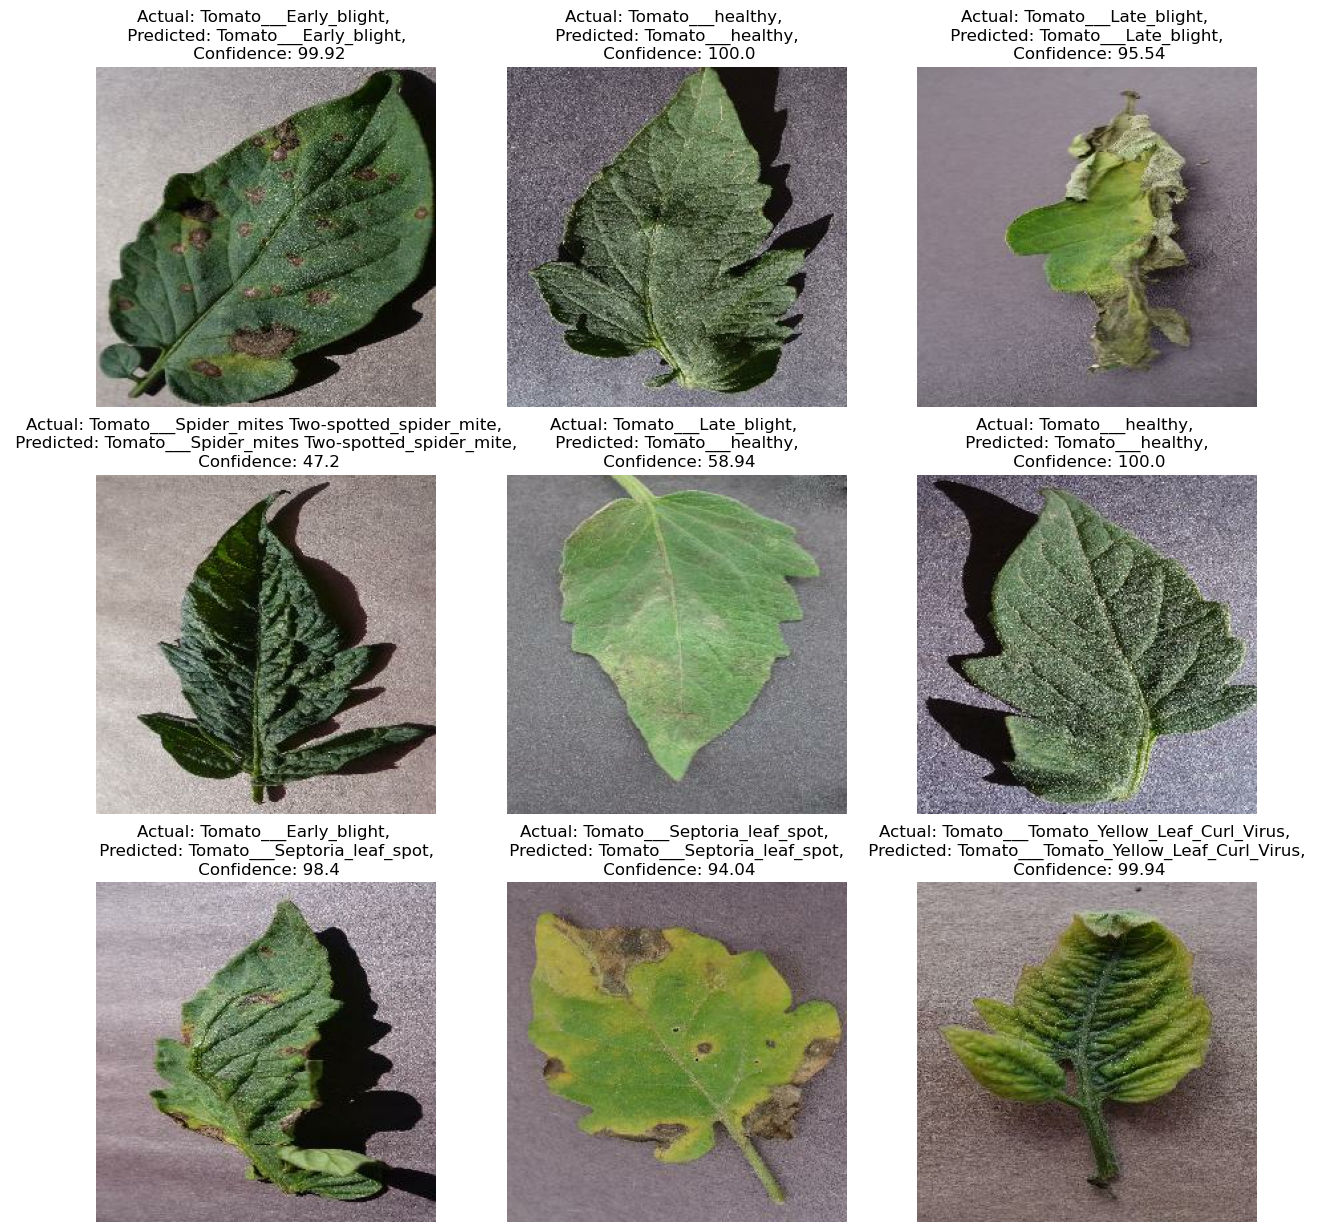

In [39]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}")
        plt.axis("off")

In [ ]:
import os
version_number = max([int(i) in os.listdir("./models")]+[0]) + 1